<a href="https://colab.research.google.com/github/LimJavier/Weatherwise-Javier-Lim/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.2/452.2 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 83.0 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing

In [ ]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

## 📦 Setup and Configuration
Import required packages and setup environment.

In [10]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip

# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here
import time
import fetch_my_weather
import hands_on_ai
import re
import logging
from datetime import datetime, timedelta
from typing import Dict, Any, Optional, List
# Set up logging
logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(__name__)

## 🌤️ Weather Data Functions

In [3]:
# Define get_weather_data() function here
def get_weather_data(location, units="metric", forecast_days=0, max_retries=3):
    """
    Retrieve weather data for a specified location with optional forecast days.

    Args:
        location (str): City name (e.g., "Perth") or "City,Country" (e.g., "Perth,AU").
        units (str): "metric" (°C) or "imperial" (°F). Default is "metric".
        forecast_days (int): Number of days to forecast (0 = current weather only). Max = 5.
        max_retries (int): Number of retry attempts for connection errors. Default = 3.

    Returns:
        dict: Structured weather information including:
            - location: Verified location name and country
            - current: Current weather data (temperature, humidity, description, wind speed)
            - forecast: List of daily forecasts (if forecast_days > 0)
            - summary: Human-readable weather summary

    Raises:
        ValueError: Invalid parameters, location, or API key.
        ConnectionError: Unable to connect after retries.
    """

    API_KEY = "16d5a3f7e99677a7415465b4d0268f45"
    CURRENT_URL = "https://api.openweathermap.org/data/2.5/weather"
    FORECAST_URL = "https://api.openweathermap.org/data/2.5/forecast"

    def request_with_retries(url, params, retries=max_retries):
        """Helper: Retry request if connection fails."""
        attempt = 0
        while attempt < retries:
            try:
                response = requests.get(url, params=params, timeout=10)
                if response.status_code == 401:
                    raise ValueError("Invalid API key. Please check your OpenWeatherMap API key.")
                if response.status_code == 404:
                    raise ValueError(f"Location '{location}' not found. Please check the location name.")
                response.raise_for_status()
                return response.json()
            except requests.exceptions.RequestException as e:
                attempt += 1
                if attempt >= retries:
                    raise ConnectionError(f"Failed to connect after {retries} attempts: {e}")
                print(f"[Warning] Attempt {attempt} failed: {e}. Retrying...")
                time.sleep(2)

    # Validate forecast_days parameter
    if not isinstance(forecast_days, int) or forecast_days < 0 or forecast_days > 5:
        raise ValueError("forecast_days must be an integer between 0 and 5.")

    # Fetch current weather
    params = {"q": location, "appid": API_KEY, "units": units}
    current_data = request_with_retries(CURRENT_URL, params)

    if current_data.get("cod") != 200:
        error_message = current_data.get("message", "Unknown error")
        if "invalid api key" in error_message.lower():
            raise ValueError("Invalid API key. Please check your API key in OpenWeatherMap.")
        elif "city not found" in error_message.lower():
            raise ValueError(f"Location '{location}' not found. Please check the spelling.")
        else:
            raise ValueError(f"Error from API: {error_message}")

    current_weather = {
        "temperature": current_data["main"]["temp"],
        "humidity": current_data["main"]["humidity"],
        "description": current_data["weather"][0]["description"].capitalize(),
        "wind_speed": current_data["wind"]["speed"],
    }

    weather_output = {
        "location": f"{current_data.get('name')}, {current_data.get('sys', {}).get('country')}",
        "current": current_weather,
        "forecast": [],
        "summary": f"Current weather in {current_data.get('name')}: {current_weather['description']}, "
                   f"{current_weather['temperature']}° with {current_weather['humidity']}% humidity."
    }

    # Fetch forecast if requested
    if forecast_days > 0:
        forecast_params = {"q": location, "appid": API_KEY, "units": units}
        forecast_data = request_with_retries(FORECAST_URL, forecast_params)

        if forecast_data.get("cod") != "200":
            error_message = forecast_data.get("message", "Unknown error")
            raise ValueError(f"Forecast error: {error_message}")

        daily_forecast = {}
        for entry in forecast_data["list"]:
            date = entry["dt_txt"].split(" ")[0]
            if date not in daily_forecast:
                daily_forecast[date] = {
                    "temperature_min": entry["main"]["temp_min"],
                    "temperature_max": entry["main"]["temp_max"],
                    "description": entry["weather"][0]["description"].capitalize()
                }
            else:
                daily_forecast[date]["temperature_min"] = min(daily_forecast[date]["temperature_min"], entry["main"]["temp_min"])
                daily_forecast[date]["temperature_max"] = max(daily_forecast[date]["temperature_max"], entry["main"]["temp_max"])

        sorted_dates = sorted(daily_forecast.keys())
        weather_output["forecast"] = [
            {"date": d, **daily_forecast[d]} for d in sorted_dates[:forecast_days]
        ]

        weather_output["summary"] += f" Forecast available for next {forecast_days} day(s)."

    return weather_output

# Testing for weather data retrieval
try:
    weather = get_weather_data("Iceland", units="metric", forecast_days=5)
    print(weather["summary"])
    print("Current:", weather["current"])
    if weather["forecast"]:
        print("Forecast:")
        for day in weather["forecast"]:
            print(day)
except ValueError as ve:
    print(f"[ValueError] {ve}")
except ConnectionError as ce:
    print(f"[ConnectionError] {ce}")
except Exception as e:
    print(f"[Error] {e}")

Current weather in Iceland: Overcast clouds, 3.77° with 98% humidity. Forecast available for next 5 day(s).
Current: {'temperature': 3.77, 'humidity': 98, 'description': 'Overcast clouds', 'wind_speed': 1.75}
Forecast:
{'date': '2025-10-11', 'temperature_min': 3.77, 'temperature_max': 6.2, 'description': 'Overcast clouds'}
{'date': '2025-10-12', 'temperature_min': 5.93, 'temperature_max': 8.5, 'description': 'Overcast clouds'}
{'date': '2025-10-13', 'temperature_min': 5.41, 'temperature_max': 7, 'description': 'Overcast clouds'}
{'date': '2025-10-14', 'temperature_min': 4.33, 'temperature_max': 6.14, 'description': 'Overcast clouds'}
{'date': '2025-10-15', 'temperature_min': 4.84, 'temperature_max': 7.6, 'description': 'Overcast clouds'}


## 📊 Visualisation Functions

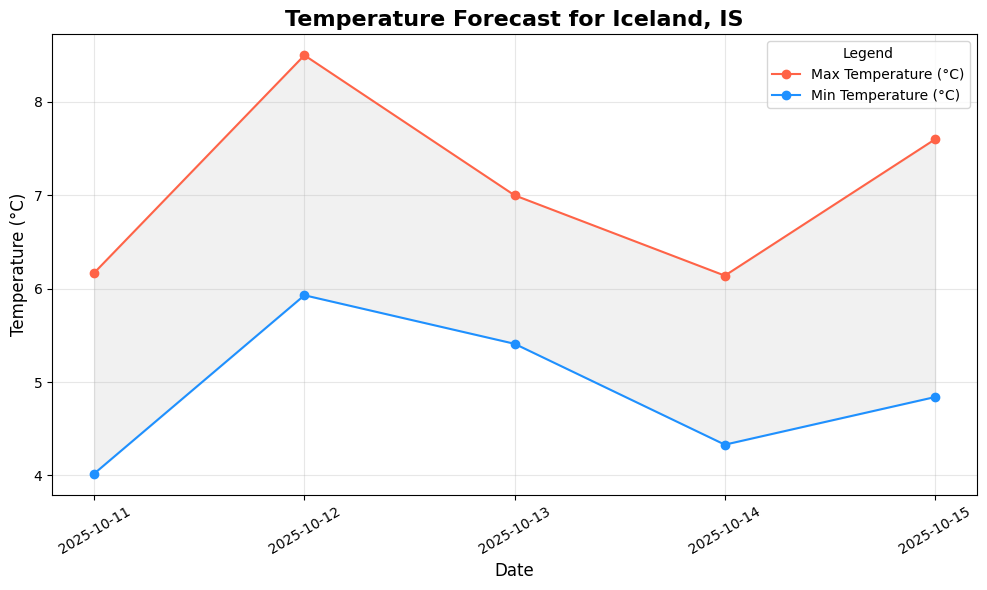

In [6]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create a temperature trend visualisation from processed weather forecast data.

    Purpose:
        To plot the minimum and maximum temperature trends for a location over forecast days,
        enhancing data readability for analysis or reporting.

    Args:
        weather_data (dict): Processed weather data containing:
            - location (str): Location name (e.g., "Perth, AU").
            - forecast (list of dict): Forecast list with each entry containing:
                * 'date' (str): Date in YYYY-MM-DD format.
                * 'temperature_min' (float): Minimum temperature for the day.
                * 'temperature_max' (float): Maximum temperature for the day.
        output_type (str): Determines output behaviour:
            - 'display': Display the chart directly.
            - 'return': Return the Matplotlib figure object for further use.

    Returns:
        matplotlib.figure.Figure or None:
            - Returns the figure object if output_type='return'.
            - Returns None if output_type='display'.
    Raises:
        ValueError: If forecast data is missing or incomplete.
        TypeError: If input data format is incorrect.
    """

    # Validate forecast data
    if not weather_data or "forecast" not in weather_data:
        raise ValueError("Missing weather forecast data.")

    forecast = weather_data["forecast"]
    if not isinstance(forecast, list) or len(forecast) == 0:
        raise ValueError("Forecast data must be a non-empty list.")

    # Extract dates and temperatures with error handling
    dates = []
    temp_min = []
    temp_max = []
    for entry in forecast:
        try:
            dates.append(entry["date"])
            temp_min.append(float(entry["temperature_min"]))
            temp_max.append(float(entry["temperature_max"]))
        except (KeyError, TypeError, ValueError):
            raise ValueError("Forecast entries must contain valid 'date', 'temperature_min', and 'temperature_max'.")

    # Check for extreme or missing values
    if any(t is None for t in temp_min + temp_max):
        raise ValueError("Temperature data contains None values.")
    if any(abs(t) > 100 for t in temp_min + temp_max):  # Extreme check
        raise ValueError("Temperature data contains unrealistic values.")

    # Create figure and plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(dates, temp_max, label="Max Temperature (°C)", color="tomato", marker="o")
    ax.plot(dates, temp_min, label="Min Temperature (°C)", color="dodgerblue", marker="o")
    ax.fill_between(dates, temp_min, temp_max, color="lightgray", alpha=0.3)

    # Improve readability
    ax.set_title(f"Temperature Forecast for {weather_data.get('location', 'Unknown Location')}", fontsize=16, weight='bold')
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Temperature (°C)", fontsize=12)
    ax.tick_params(axis='x', rotation=30)
    ax.grid(alpha=0.3)
    ax.legend(title="Legend", fontsize=10)

    plt.tight_layout()

    # Display or return figure
    if output_type == 'display':
        plt.show()
        return None
    elif output_type == 'return':
        return fig
    else:
        raise ValueError("Invalid output_type. Use 'display' or 'return'.")

# Testing for temperature visualisation
weather_data = get_weather_data(location="Iceland", forecast_days=5)
create_temperature_visualisation(weather_data, output_type="display")


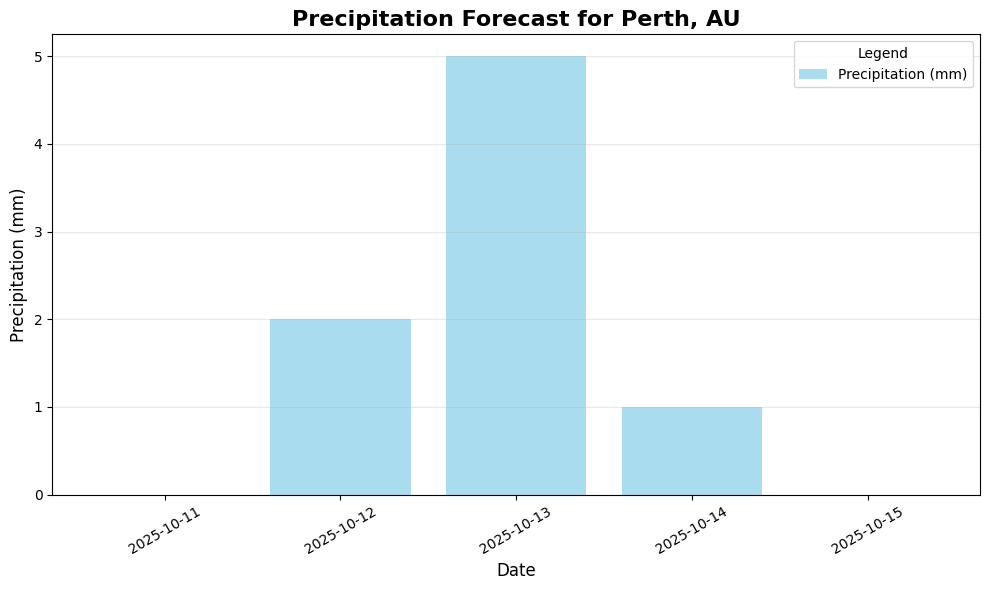

In [7]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create a precipitation trend visualisation from processed weather forecast data.

    Purpose:
        To plot daily precipitation trends for a location over forecast days,
        making precipitation patterns easy to interpret.

    Args:
        weather_data (dict): Processed weather data containing:
            - location (str): Location name (e.g., "Perth, AU").
            - forecast (list of dict): Forecast list with each entry containing:
                * 'date' (str): Date in YYYY-MM-DD format.
                * 'precipitation' (float): Precipitation in millimeters for the day.
        output_type (str): Determines output behaviour:
            - 'display': Display the chart directly.
            - 'return': Return the Matplotlib figure object for further use.

    Returns:
        matplotlib.figure.Figure or None:
            - Returns the figure object if output_type='return'.
            - Returns None if output_type='display'.

    Raises:
        ValueError: If forecast data is missing or incomplete.
        TypeError: If input data format is incorrect.
    """

    # Validate forecast data
    if not weather_data or "forecast" not in weather_data:
        raise ValueError("Missing weather forecast data.")

    forecast = weather_data["forecast"]
    if not isinstance(forecast, list) or len(forecast) == 0:
        raise ValueError("Forecast data must be a non-empty list.")

    # Extract dates and precipitation values
    dates = []
    precipitation = []
    for entry in forecast:
        try:
            dates.append(entry["date"])
            precipitation.append(float(entry.get("precipitation", 0)))
        except (KeyError, TypeError, ValueError):
            raise ValueError("Forecast entries must contain valid 'date' and 'precipitation' values.")

    # Create figure and plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(dates, precipitation, color="skyblue", alpha=0.7, label="Precipitation (mm)")

    # Improve readability
    ax.set_title(f"Precipitation Forecast for {weather_data.get('location', 'Unknown Location')}", fontsize=16, weight='bold')
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Precipitation (mm)", fontsize=12)
    ax.tick_params(axis='x', rotation=30)
    ax.grid(alpha=0.3, axis='y')
    ax.legend(title="Legend", fontsize=10)

    plt.tight_layout()

    # Display or return figure
    if output_type == 'display':
        plt.show()
        return None
    elif output_type == 'return':
        return fig
    else:
        raise ValueError("Invalid output_type. Use 'display' or 'return'.")

# Testing for percipitation visualisation
weather_data = {
    "location": "Perth, AU",
    "forecast": [
        {"date": "2025-10-11", "temperature_min": 19, "temperature_max": 29, "precipitation": 0},
        {"date": "2025-10-12", "temperature_min": 18, "temperature_max": 27, "precipitation": 2},
        {"date": "2025-10-13", "temperature_min": 20, "temperature_max": 30, "precipitation": 5},
        {"date": "2025-10-14", "temperature_min": 17, "temperature_max": 28, "precipitation": 1},
        {"date": "2025-10-15", "temperature_min": 16, "temperature_max": 26, "precipitation": 0}
    ]
}

create_precipitation_visualisation(weather_data, output_type='display')

## 🤖 Natural Language Processing

In [12]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question: Any, default_location: Optional[str] = None) -> Dict[str, Any]:
    """
    Parse a weather-related question and extract key information.

    Args:
        question: The user's weather question
        default_location: Default location to use if none is found

    Returns:
        Dictionary containing location, time_period, attribute, query_type, error, and confidence
    """
    # Initialize result structure with error field
    result = {
        "location": None,
        "time_period": None,
        "attribute": None,
        "query_type": None,
        "error": None,
        "confidence": "high"
    }

    try:
        # Step 1: Handle empty or invalid input
        if question is None:
            result["error"] = "Empty input: No question provided"
            return result

        if not isinstance(question, str):
            result["error"] = "Invalid input type: Question must be a string"
            return result

        # Step 2: Preprocess the question
        normalized_question = question.strip()

        if not normalized_question or len(normalized_question) < 3:
            result["error"] = "Invalid input: Question too short or empty"
            return result

        normalized_question = normalized_question.lower()

        # Step 3: Check if question is weather-related
        weather_indicators = [
            "weather", "rain", "temperature", "wind", "snow", "cloud",
            "sunny", "hot", "cold", "warm", "cool", "storm", "forecast",
            "humid", "fog", "drizzle", "precipitation", "degrees"
        ]

        is_weather_related = any(indicator in normalized_question for indicator in weather_indicators)

        if not is_weather_related:
            result["error"] = "Not a weather question: Unable to identify weather-related keywords"
            result["confidence"] = "low"
            # Continue processing anyway

        # Step 4: Extract location with error handling
        try:
            # Try regex pattern for "in/at [Location]"
            location_pattern = r'\b(?:in|at)\s+([A-Z][a-zA-Z\s]+?)(?:\s|$|\?|,)'
            match = re.search(location_pattern, question)
            if match:
                result["location"] = match.group(1).strip()

            # Also try to find capitalized words that might be locations
            if result["location"] is None:
                # Look for capitalized words (likely place names)
                cap_pattern = r'\b([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)\b'
                matches = re.findall(cap_pattern, question)
                if matches:
                    # Filter out common words that aren't locations
                    non_locations = {"Will", "What", "How", "When", "Where", "Is", "The", "A", "An"}
                    locations = [m for m in matches if m not in non_locations]
                    if locations:
                        result["location"] = locations[0]

        except Exception as e:
            logger.warning(f"Location extraction failed: {str(e)}")
            result["confidence"] = "medium"

        # Handle ambiguous or missing location
        if result["location"] is None:
            if default_location:
                result["location"] = default_location
                result["confidence"] = "medium"
            else:
                result["error"] = "Missing location: Unable to determine location from question"
                result["confidence"] = "low"

        # Step 5: Extract time period with error handling
        try:
            result["time_period"] = extract_time_period(normalized_question)

            # Handle ambiguous time references
            ambiguous_terms = ["soon", "later", "future", "past"]
            for term in ambiguous_terms:
                if term in normalized_question and result["time_period"] is None:
                    result["error"] = f"Ambiguous time reference: '{term}' is too vague"
                    result["confidence"] = "low"
                    break

            # Default to today if no time mentioned
            if result["time_period"] is None:
                result["time_period"] = datetime.now().strftime("%Y-%m-%d")
                result["confidence"] = "medium"

        except Exception as e:
            logger.warning(f"Time extraction failed: {str(e)}")
            result["time_period"] = datetime.now().strftime("%Y-%m-%d")
            result["confidence"] = "low"

        # Step 6: Extract weather attribute with validation
        try:
            attribute_keywords = {
                "rain": ["rain", "raining", "rainy", "precipitation", "drizzle", "shower"],
                "temperature": ["temperature", "hot", "cold", "warm", "cool", "degrees", "temp"],
                "wind": ["wind", "windy", "breeze", "gust"],
                "snow": ["snow", "snowing", "snowy", "sleet"],
                "clouds": ["cloud", "cloudy", "overcast", "sky"],
                "humidity": ["humid", "humidity", "moisture"],
                "sun": ["sun", "sunny", "sunshine", "clear"],
                "storm": ["storm", "stormy", "thunder", "lightning"],
                "fog": ["fog", "foggy", "mist", "misty"],
                "general": ["weather", "forecast", "conditions"]
            }

            matched_attributes = []
            for attribute, keywords in attribute_keywords.items():
                if any(keyword in normalized_question for keyword in keywords):
                    matched_attributes.append(attribute)

            # Handle multiple conflicting attributes (ambiguity)
            if len(matched_attributes) > 2:
                result["error"] = "Ambiguous question: Multiple weather attributes detected"
                result["attribute"] = matched_attributes[0]
                result["confidence"] = "low"
            elif len(matched_attributes) == 0:
                result["attribute"] = "general"
                if not is_weather_related:
                    result["confidence"] = "low"
            else:
                result["attribute"] = matched_attributes[0]

        except Exception as e:
            logger.warning(f"Attribute extraction failed: {str(e)}")
            result["attribute"] = "general"
            result["confidence"] = "low"

        # Step 7: Determine query type with error handling
        try:
            question_words = ["will", "is", "does", "can", "should"]
            wh_words = ["what", "how", "when", "where"]

            if any(word in normalized_question for word in question_words):
                result["query_type"] = "yes_no"
            elif any(word in normalized_question for word in wh_words):
                if any(phrase in normalized_question for phrase in ["how much", "how hot", "how cold"]):
                    result["query_type"] = "quantity"
                else:
                    result["query_type"] = "descriptive"
            else:
                result["query_type"] = "general"

        except Exception as e:
            logger.warning(f"Query type detection failed: {str(e)}")
            result["query_type"] = "general"

        # Step 8: Final validation
        if result["location"] is None and result["time_period"] is None and result["attribute"] is None:
            result["error"] = "Unable to extract any weather information from question"
            result["confidence"] = "low"

        return result

    except Exception as e:
        # Catch-all for unexpected errors
        logger.error(f"Unexpected error in parse_weather_question: {str(e)}")
        return {
            "location": None,
            "time_period": datetime.now().strftime("%Y-%m-%d"),
            "attribute": "general",
            "query_type": "general",
            "error": f"Processing error: {str(e)}",
            "confidence": "low"
        }


def extract_time_period(normalized_question: str) -> Optional[str]:
    """
    Extract time period from the question and return as a date string.

    Args:
        normalized_question: Lowercase question text

    Returns:
        Date string in YYYY-MM-DD format or None
    """
    today = datetime.now()

    # Direct day references
    if "today" in normalized_question:
        return today.strftime("%Y-%m-%d")
    elif "tomorrow" in normalized_question:
        return (today + timedelta(days=1)).strftime("%Y-%m-%d")
    elif "yesterday" in normalized_question:
        return (today - timedelta(days=1)).strftime("%Y-%m-%d")
    elif "tonight" in normalized_question:
        return today.strftime("%Y-%m-%d")

    # Week references
    if "next week" in normalized_question:
        return (today + timedelta(weeks=1)).strftime("%Y-%m-%d")
    elif "this week" in normalized_question:
        return today.strftime("%Y-%m-%d")

    # Weekend
    if "weekend" in normalized_question or "this weekend" in normalized_question:
        # Find next Saturday
        days_ahead = 5 - today.weekday()  # Saturday is 5
        if days_ahead <= 0:
            days_ahead += 7
        return (today + timedelta(days=days_ahead)).strftime("%Y-%m-%d")

    # Day of week
    days_of_week = {
        "monday": 0, "tuesday": 1, "wednesday": 2, "thursday": 3,
        "friday": 4, "saturday": 5, "sunday": 6
    }

    for day_name, day_num in days_of_week.items():
        if day_name in normalized_question:
            # Find next occurrence of this day
            current_day = today.weekday()
            days_ahead = day_num - current_day
            if days_ahead <= 0:  # Target day already happened this week
                days_ahead += 7
            return (today + timedelta(days=days_ahead)).strftime("%Y-%m-%d")

    # Time of day (return today's date with note)
    time_of_day = ["morning", "afternoon", "evening", "night"]
    for time in time_of_day:
        if time in normalized_question:
            return today.strftime("%Y-%m-%d")

    return None

# Example usage and testing
if __name__ == "__main__":
    test_questions = [
        "Will it rain tomorrow in Perth?",
        "What's the weather like in London today?",
        "How hot will it be next Monday?",
        "Is it going to snow this weekend?",
        "",  # Empty input
        123,  # Invalid type
        "What time is the meeting?",  # Not weather-related
        "Weather tomorrow",  # Missing location
        "Rain soon in Sydney",  # Ambiguous time
    ]

    print("=" * 80)
    print("WEATHER QUESTION PARSER - TEST RESULTS")
    print("=" * 80)

    for i, question in enumerate(test_questions, 1):
        print(f"\n{i}. Question: {repr(question)}")
        result = parse_weather_question(question, default_location="Perth")
        print(f"   Location: {result['location']}")
        print(f"   Time: {result['time_period']}")
        print(f"   Attribute: {result['attribute']}")
        print(f"   Query Type: {result['query_type']}")
        print(f"   Confidence: {result['confidence']}")
        if result['error']:
            print(f"   Error: {result['error']}")
        print("-" * 80)

WEATHER QUESTION PARSER - TEST RESULTS

1. Question: 'Will it rain tomorrow in Perth?'
   Location: Perth
   Time: 2025-10-12
   Attribute: rain
   Query Type: yes_no
   Confidence: high
--------------------------------------------------------------------------------

2. Question: "What's the weather like in London today?"
   Location: London
   Time: 2025-10-11
   Attribute: general
   Query Type: descriptive
   Confidence: high
--------------------------------------------------------------------------------

3. Question: 'How hot will it be next Monday?'
   Location: Monday
   Time: 2025-10-13
   Attribute: temperature
   Query Type: yes_no
   Confidence: high
--------------------------------------------------------------------------------

4. Question: 'Is it going to snow this weekend?'
   Location: Perth
   Time: 2025-10-11
   Attribute: snow
   Query Type: yes_no
   Confidence: medium
--------------------------------------------------------------------------------

5. Question: '

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.